# **Data Collection**

<p style="text-align: center;">
    <img style="width: 35%; height: 20%; float: left;" src="../assets/images/data_collection.jpg" alt="Data Collection image">
</p>

## Objectives

**1. Data Gathering:**
* Collect the dataset from the Kaggle API endpoint and simplify the download process.

**2. Preparing and Refining Data:**
* Perform comprehensive cleaning and preprocessing on the data to ensure its quality and readiness.

**3. Splitting and Organizing Data:**
* Divide the refined dataset into separate Train, Validation, and Test subsets, optimizing their composition for accurate model training and evaluation.

## Inputs Required

**1. Authentication file (kaggle.json):**

* The Kaggle API authentication key is required to access and retrieve the data seamlessly.

**2. Kaggle API Integration:**

* Utilize the Kaggle API to facilitate the systematic download and integration of the dataset.

## Generated Outputs

**1. Split Dataset Distribution:**

* The processed Train, Validation, and Test datasets are structured within the `inputs/cherry_leaves_dataset/cherry-leaves` directory.

**2. Visual representation of Data Distribution:**

* Showcase the distribution of data across the above folders through a concise and insightful Pie Chart visualization.


---

# Set up the working environment

## Install the required packages

In [1]:
! pip install -r /workspaces/mildew-detection-in-cherry-leaves/requirements.txt

## Import libraries

In [2]:
import numpy
import os
import matplotlib.pyplot as plt
import shutil
import random
import zipfile
print("\033[92mLibraries Imported Successfully!\033[0m")

Libraries Imported Successfully!


# Change working directory

* To maintain a straightforward folder structure for the application, we must navigate from the current folder to its parent folder by using `os.getcwd()` to access the current directory.

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves/jupyter_notebooks'

* To update the current directory to its parent directory, we follow these steps:

  * Use `os.path.dirname()` to obtain the parent directory.
  * Utilize `os.chdir()` to set the new current directory to the parent directory.

In [4]:
os.chdir(os.path.dirname(current_dir))
print(f"\033[92mYou set a new current directory!\033[0m")

You set a new current directory!


* Confirm the new current directory.

In [5]:
new_current_dir = os.getcwd()
new_current_dir

'/workspaces/mildew-detection-in-cherry-leaves'

# Set input and output directory paths

**Inputs**

In [6]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

**Outputs**

In [7]:
version = 'V_1'

file_path = f'outputs/{version}'
version_file_path = os.path.join(new_current_dir, file_path)

if os.path.exists(version_file_path):
    # check if version file path exists, if not creates a new directory.
     print(f"\033[91mVersion {version} already exists. Create a new version please! \033[0m")
     pass
else:
    os.makedirs(name=file_path)
    print(f"\033[92mVersion {version} created successfully! \033[0m")

Version V_1 created successfully! 


---

# Install Kaggle Package

In [8]:
! pip install kaggle

Set the Kaggle configuration directory to the current working directory so that we can change the permission of the JSON file to 600 to establish connection.

In [9]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
print(os.environ['KAGGLE_CONFIG_DIR'])
! chmod 600 kaggle.json

/workspaces/mildew-detection-in-cherry-leaves


## Download dataset from Kaggle API

* First set Kaggle Dataset path, destination folder and then download dataset so can use it in further steps.

In [10]:
KaggleDatasetPath = 'codeinstitute/cherry-leaves'
DestinationFolder = 'inputs/cherry_leaves_dataset'
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

 91%|██████████████████████████████████▌   | 50.0M/55.0M [00:00<00:00, 61.5MB/s]
100%|██████████████████████████████████████| 55.0M/55.0M [00:00<00:00, 59.0MB/s]


* Next extract files from downloaded file and delete the zip file.

In [11]:
with zipfile.ZipFile(DestinationFolder + '/cherry-leaves.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/cherry-leaves.zip')

---

# Data Cleaning and Preparation

## Data Cleaning

* Check if all files in both dataset, **Healthy and Powdery_Mildew**, are image data files.
* If non-image data found then it will be removed from dataset.

In [12]:
def remove_non_image_data(data_dir):
    """
    Loop through dataset to identify and remove non-image data files.
    """
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.webp')
    for root, dirs, files in os.walk(data_dir):
        # os.walk() function generates the file names in a directory tree
        # by walking either top-down or bottom-up through the directory tree.
        i = 0
        j = 0
        for file in files:
            if not file.lower().endswith(image_extensions):
                file_path = os.path.join(
                    root, file)  # create the file path for non-image data files
                os.remove(file_path)  # remove non-image data files from dataset
                i += 1
            else:
                j += 1
        print(f'Folder: {root}, has - \033[1m{j} image file(s)\033[0m')
        print(f'Folder: {root}, has -  \033[1m{i} non-image file(s)\033[0m \n')

The `os.walk()` method efficiently traverses directory trees, automatically handling path concatenation, and generating files, not directories. It simplifies the code and enhances performance for large projects, as demonstrated in the results above.

In [13]:
remove_non_image_data(data_dir='inputs/cherry_leaves_dataset/cherry-leaves')

Folder: inputs/cherry_leaves_dataset/cherry-leaves, has - 0 image file(s)
Folder: inputs/cherry_leaves_dataset/cherry-leaves, has -  0 non-image file(s) 

Folder: inputs/cherry_leaves_dataset/cherry-leaves/healthy, has - 2104 image file(s)
Folder: inputs/cherry_leaves_dataset/cherry-leaves/healthy, has -  0 non-image file(s) 

Folder: inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew, has - 2104 image file(s)
Folder: inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew, has -  0 non-image file(s) 



---

## Split the dataset into Train, Validation and Test datasets.

The 70-10-20 split ratio is well-justified considering the dataset's relative size. With a 70% training set, we have a solid foundation for model learning. The 10% validation set allows us to fine-tune hyperparameters effectively, mitigating overfitting to the training data. Finally, a 20% test set offers a fair evaluation of the model's performance on unseen data.

This partitioning ratio strikes a balance between the validation/test set sizes and the available training data. Larger validation/test sets yield more reliable estimates of the model's generalization ability, essential for avoiding overfitting issues.

In [14]:
def split_dataset_images(data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    """
    Check if split ratios = 1.0
    Split image data in the specified directories: train=0.7, validation=0.1, and test=0.2 datasets.
    Moves images to corresponding subdirectories in a random selection.
    """
    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("\033[91mError: train_set_ratio + validation_set_ratio + test_set_ratio should sum to 1.0!\033[0m")
        return

    # get class labels in data directory
    labels = os.listdir(data_dir)
    if 'test' in labels:
        pass
    else:
        # Create train, validation, and test folders with class labels sub-folders
        for folder in ['train', 'validation', 'test']:
            for label in labels:
                folder_path = os.path.join(data_dir, folder, label)
                os.makedirs(folder_path)

        for label in labels:
            # randomly shuffle files inside files_path directory
            files = os.listdir(os.path.join(data_dir, label))
            random.shuffle(files)

            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)

            # Move files to appropriate set directories
            # Use of enumerate leads to improved memory efficiency and faster execution time,
            # particularly in cases where the loop is iterating over a large number of items.
            for count, file_name in enumerate(files):
                if count < train_set_files_qty:
                    # move a given file to the train set
                    shutil.move(os.path.join(data_dir, label, file_name),
                                os.path.join(data_dir, 'train', label, file_name))

                elif count < (train_set_files_qty + validation_set_files_qty):
                    # move a given file to the validation set
                    shutil.move(os.path.join(data_dir, label, file_name),
                                os.path.join(data_dir, 'validation', label, file_name))

                else:
                    # move given file to test set
                    shutil.move(os.path.join(data_dir, label, file_name),
                                os.path.join(data_dir, 'test', label, file_name))
            
            # Remove original label folders
            label_folder = os.path.join(data_dir, label)
            if os.path.isdir(label_folder):
                shutil.rmtree(label_folder)

In [15]:
split_dataset_images(data_dir=f"inputs/cherry_leaves_dataset/cherry-leaves",
                                   train_set_ratio=0.7,
                                   validation_set_ratio=0.1,
                                   test_set_ratio=0.2)

### After splitting dataset on each folder and subfolders, files contained are respectively:

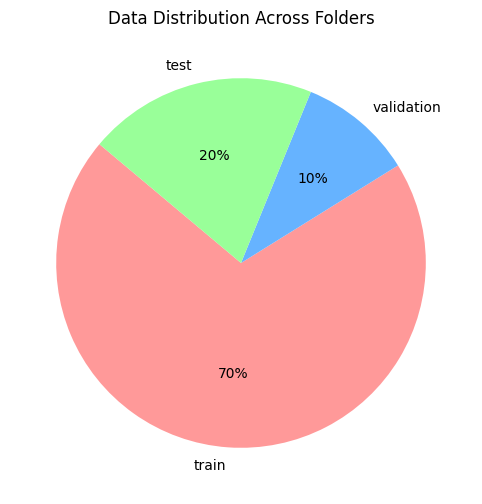

In [16]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
folders = ['train', 'validation', 'test']
labels = ['healthy', 'powdery_mildew']
file_path = f'outputs/{version}'

# Calculate the number of image files per folder
num_files_per_folder = []
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    num_files = sum(len(os.listdir(os.path.join(folder_path, label))) for label in labels)
    num_files_per_folder.append(num_files)

# Define a color palette for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plot a pie chart to visualize the data distribution in subsets
plt.figure(figsize=(8, 6))
plt.pie(num_files_per_folder, labels=folders, autopct='%.f%%', colors=colors, startangle=140)
plt.title('Data Distribution Across Folders')

# Create the directory if it doesn't exist
if not os.path.exists(file_path):
    os.makedirs(file_path)
image_name = 'data_distribution_piechart.png'
image_path = os.path.join(file_path, image_name)
plt.savefig(image_path, bbox_inches='tight', dpi=150)
plt.show()

**Interpretation & Insights:**

* The largest slice (70%, coral color) represents the training dataset.
* The smallest slice (10%, lightblue color) denotes the validation dataset.
* A smaller slice (20%, lightgreen color) signifies the test dataset.

This visualization offers insights into how the data is distributed among these subsets, allowing us to observe the proportion of data allocated for training, validation, and testing purposes.

---

# Conclusions:

* In this notebook, we downloaded data from Kaggle API endpoint and performed data cleaning to eliminate any non-image data files, ensuring that we only retained relevant data for our analysis and model training.
* We splitted the dataset into three distinct subsets: the training set, validation set, and test set, utilizing a 70-10-20 ratio, respectively. This strategic division is pivotal in constructing a robust and adaptable model with high generalization capabilities.

# Next steps:

* In the following notebook, we'll focus on data preprocessing. This involves resizing the images to a consistent size, employing data augmentation techniques, and transforming the images into a format compatible with our model's requirements.
* Manipulate the data with python and plot with an image package so the customer can visually see the difference between healthy and powdery_mildew images.

[Next: Data Visualization](../jupyter_notebooks/Data_Visualization.ipynb)

---

---